In [305]:
! pip install pandas
! pip install numpy 
! pip install seaborn
! pip install matplotlib
! pip install scikit-learn

In [303]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn

In [103]:
df=pd.read_csv('LoanDataset.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [104]:
df.shape

(614, 13)

In [105]:
df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
520,LP002689,Male,Yes,2,Not Graduate,No,2192,1742.0,45.0,360.0,1.0,Semiurban,Y
306,LP001993,Female,No,0,Graduate,No,3762,1666.0,135.0,360.0,1.0,Rural,Y
337,LP002112,Male,Yes,2,Graduate,Yes,2500,4600.0,176.0,360.0,1.0,Rural,Y
187,LP001643,Male,Yes,0,Graduate,No,2383,2138.0,58.0,360.0,NaN,Rural,Y
512,LP002643,Male,Yes,2,Graduate,No,3283,2035.0,148.0,360.0,1.0,Urban,Y
43,LP001131,Male,Yes,0,Graduate,No,3941,2336.0,134.0,360.0,1.0,Semiurban,Y
26,LP001068,Male,Yes,0,Graduate,No,2799,2253.0,122.0,360.0,1.0,Semiurban,Y
271,LP001891,Male,Yes,0,Graduate,No,11146,0.0,136.0,360.0,1.0,Urban,Y
410,LP002318,Female,No,1,Not Graduate,Yes,3867,0.0,62.0,360.0,1.0,Semiurban,N
253,LP001843,Male,Yes,1,Not Graduate,No,2661,7101.0,279.0,180.0,1.0,Semiurban,Y


In [106]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

##### Hence Loan_Amount_Term is a categorical data

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [109]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [110]:
df.duplicated().sum()

0

### There are certain null values that are to be treated during data preprocessing 
1. Gender - 13
2. Married -3
3. Dependents - 15
4. Self_Employed - 32
5. LoanAmount -22 (Numerical data)
6. Loan_Amount_Term - 14
7. Credit History - 50 <!-- it has Maximum missing values amongst all-->
 
 
 NO Duplicate value is present in the dataset 

No of total features are 13...................

#### Numerical data -
ApplicantIncome , CoapplicantIncome , LoanAmount ,


#### Categiorical columns
include Gender , Married , Dependents ,Education , Self Employed ,Loan_Amount_Term,Credit_History,Property_Area
### Output Column - 
Loan_Status

## Data preprocessing 

### 1. Data Cleaning 
Handeling null values as no duplicate values are there 

In [115]:
df.isnull().mean()*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [116]:
type(df)

pandas.core.frame.DataFrame

In [117]:
cols =[idx for idx in df.columns if df[idx].isnull().sum()>0]
for idx in cols:
    if df[idx].dtype in ['float64' , 'int64']:
        df[idx]=df[idx].fillna(df[idx].mean())
    else:
        df[idx]=df[idx].fillna(df[idx].mode() [0])

In [118]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### 2. Outlier detection and management 

### 2.1 For numerical data

<Axes: >

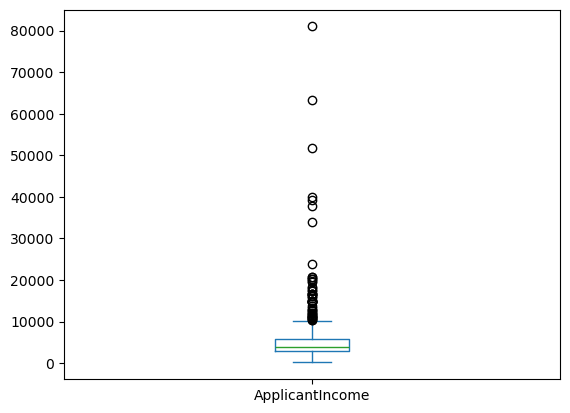

In [121]:
df['ApplicantIncome'].plot(kind='box')

<Axes: >

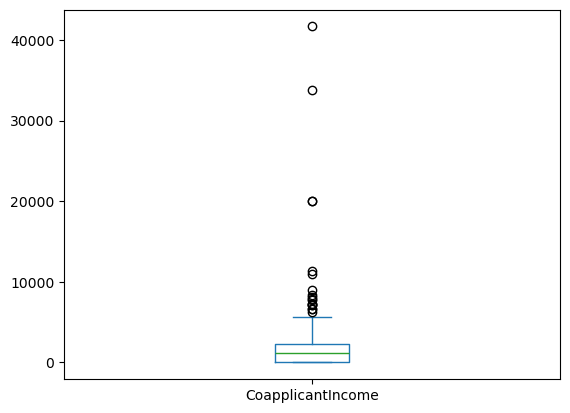

In [122]:
df['CoapplicantIncome'].plot(kind='box')

<Axes: >

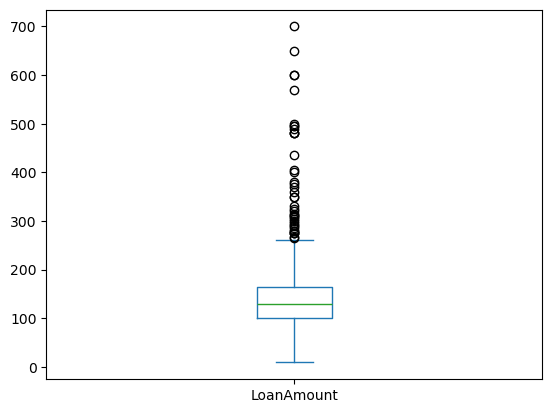

In [123]:
df['LoanAmount'].plot(kind='box')

In [124]:
newdf2 = df.copy()
columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

for col in columns:
    per25 = newdf2[col].quantile(0.25)
    per75 = newdf2[col].quantile(0.75)
    IQR = per75 - per25
    UL = per75 + 1.5 * IQR  
    LL = per25 - 1.5 * IQR  
    
    # Identify outliers
    outlierNO = newdf2[(newdf2[col] < LL) | (newdf2[col] > UL)]
    outlierCount = len(outlierNO)
    
    # Calculate percentage
    outlierPercent = (outlierCount / len(newdf2)) * 100
    print(f"Outlier percentage in {col}: {outlierPercent:.2f}%")


Outlier percentage in ApplicantIncome: 8.14%
Outlier percentage in CoapplicantIncome: 2.93%
Outlier percentage in LoanAmount: 6.68%


<Axes: ylabel='ApplicantIncome'>

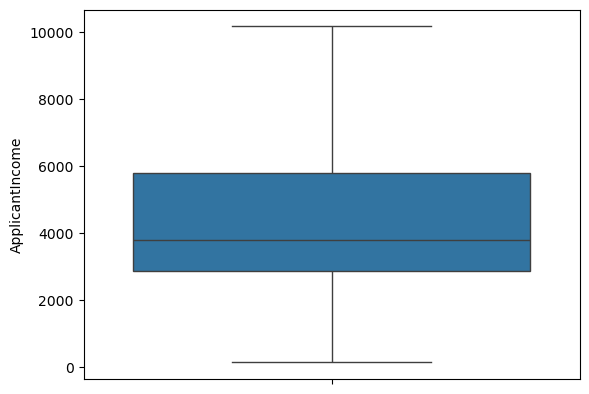

In [125]:
# specific IQR limits for ApplicantIncome
per25 = newdf2['ApplicantIncome'].quantile(0.25)
per75 = newdf2['ApplicantIncome'].quantile(0.75)
IQR = per75 - per25
UL = per75 + 1.5 * IQR 
LL = per25 - 1.5 * IQR 

# Capping the values
df2 = newdf2.copy()
newdf2['ApplicantIncome'] = np.where(newdf2['ApplicantIncome'] > UL, UL,
                                  np.where(newdf2['ApplicantIncome'] < LL, LL,
                                           newdf2['ApplicantIncome']))

# Verifying

sns.boxplot(newdf2['ApplicantIncome'])


<Axes: ylabel='CoapplicantIncome'>

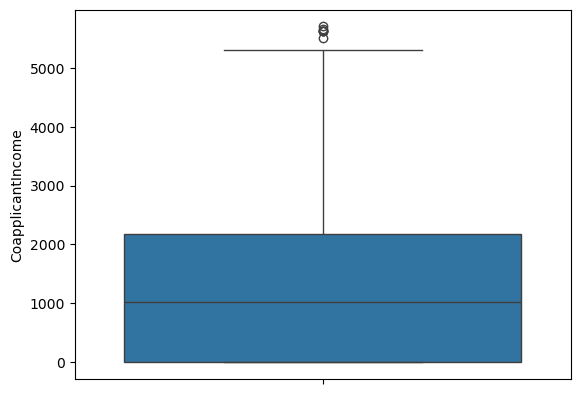

In [126]:
per25 = newdf2['CoapplicantIncome'].quantile(0.25)
per75 = newdf2['CoapplicantIncome'].quantile(0.75)
IQR = per75 - per25
UL = per75 + 1.5 * IQR 
LL = per25 - 1.5 * IQR
 # Trimming the outliers in Coapplicant Income as % of outliers is just 2.9%
newdf2 = newdf2[(newdf2['CoapplicantIncome'] >= LL) & (newdf2['CoapplicantIncome'] <= UL)]

## Verifying
sns.boxplot(newdf2['CoapplicantIncome'])

<Axes: ylabel='LoanAmount'>

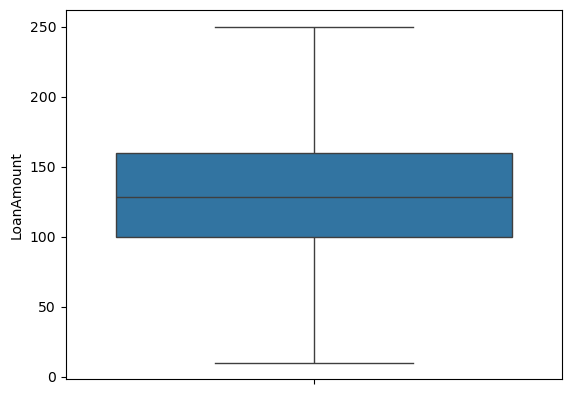

In [127]:
# LoanAmount: Capping
per25 = newdf2['LoanAmount'].quantile(0.25)
per75 = newdf2['LoanAmount'].quantile(0.75)
IQR = per75 - per25
UL = per75 + 1.5 * IQR
LL = per25 - 1.5 * IQR
newdf2.loc[:,'LoanAmount'] = np.where(newdf2['LoanAmount'] > UL, UL,
                               np.where(newdf2['LoanAmount'] < LL, LL, newdf2['LoanAmount']))
##Verifying
sns.boxplot(newdf2['LoanAmount'])


In [128]:
newdf2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,250.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.000000,360.0,1.0,Urban,Y


### Now Our Data has been cleaned from all the null values , outliers and duplicate values Now we can proceed further for the EDA

## 3. EDA {Exploratory Data Analysis}

### 3.1 Univariate Analysis over both Numerical data and categorical data

In [132]:
num_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
num_summary=newdf2[num_columns].describe() 



num_summary

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,596.000000,596.00000,596.000000
mean,4615.604027,1289.12906,135.285348
std,2460.229538,1461.72508,52.531698
min,150.000000,0.00000,10.000000
25%,2894.750000,0.00000,100.000000
50%,3812.500000,1031.00000,128.000000
75%,5754.500000,2173.00000,160.000000
max,10171.250000,5701.00000,250.000000


Insights from Summary Statistics:
**ApplicantIncome:**
Mean: 4615.6040,
Median: 3812.50 (skewed distribution).
Range: 150 t0 10171.
High standard deviation indicates variability in income.

**CoapplicantIncome:**
Mean: 1289.12,
Median: 1031.
Minimum value is 0, indicating loans without coapplicants.

**LoanAmount:**
Mean: 135.28,
Median: 128
Maximum value 250

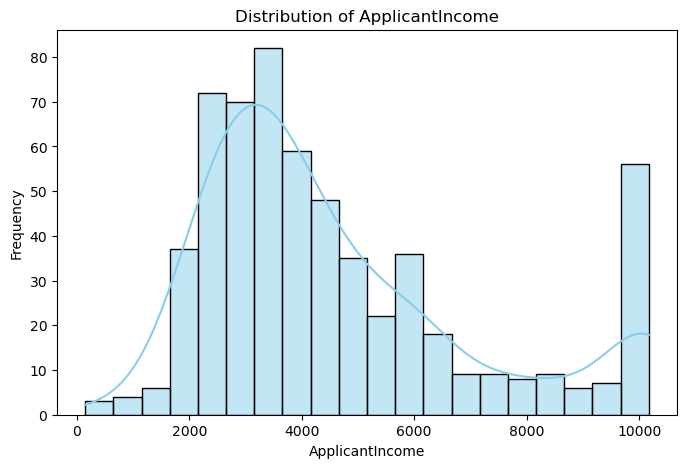

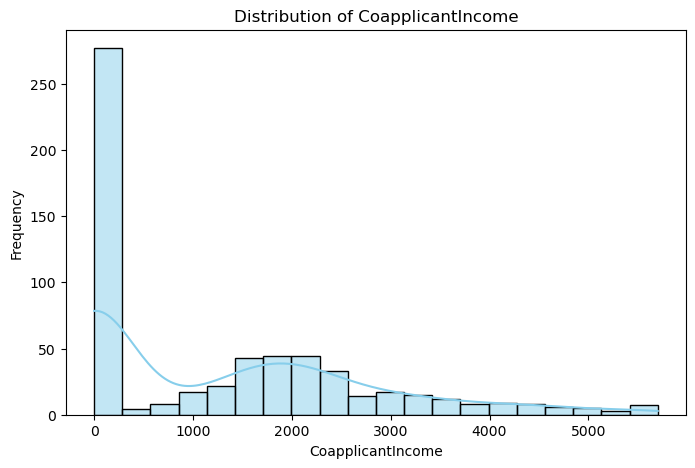

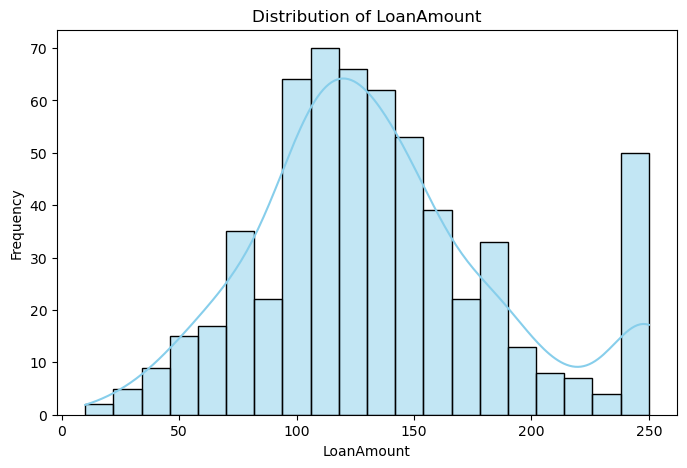

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

l = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# Plot each feature's distribution
for feature in l:
    plt.figure(figsize=(8, 5))
    sns.histplot(newdf2[feature], kde=True, bins=20, color='skyblue')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


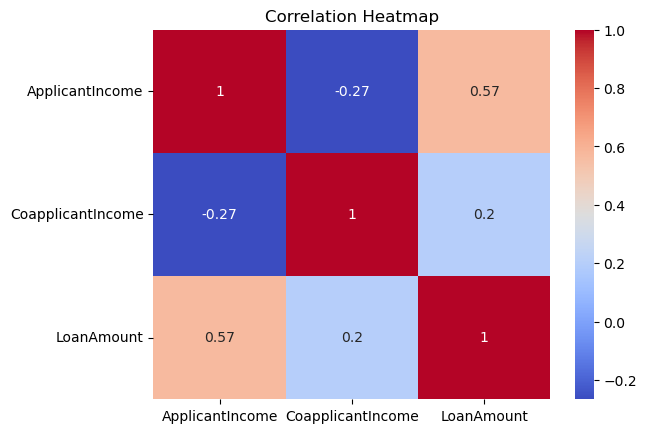

In [135]:
# Define the numerical columns
num_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# Select only the numerical columns using the list 'num_columns'
numerical_data = newdf2[num_columns]

# Compute and plot the correlation heatmap
sns.heatmap(numerical_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


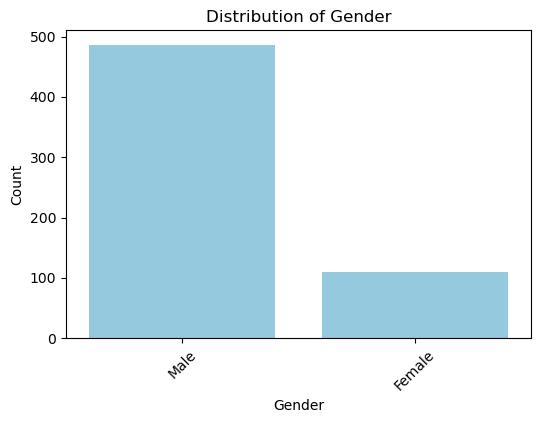

Value counts for Gender:
Gender
Male      486
Female    110
Name: count, dtype: int64



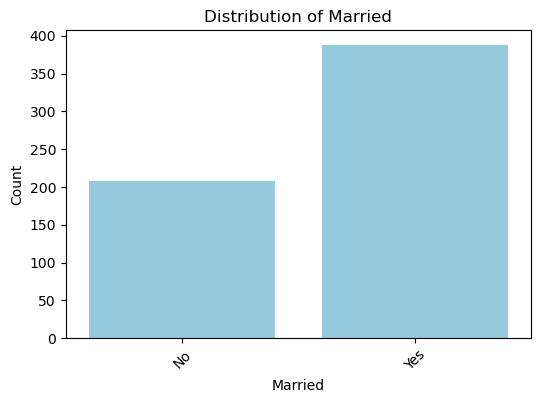

Value counts for Married:
Married
Yes    388
No     208
Name: count, dtype: int64



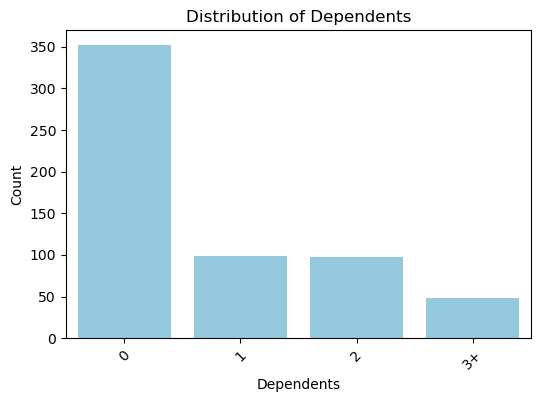

Value counts for Dependents:
Dependents
0     352
1      99
2      97
3+     48
Name: count, dtype: int64



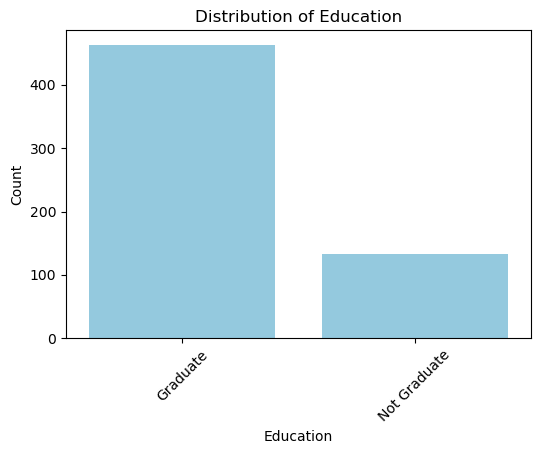

Value counts for Education:
Education
Graduate        463
Not Graduate    133
Name: count, dtype: int64



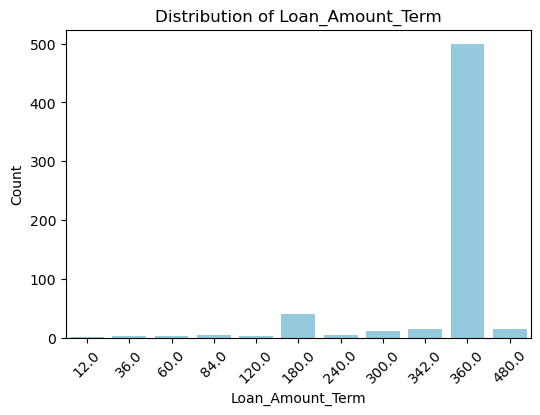

Value counts for Loan_Amount_Term:
Loan_Amount_Term
360.0    499
180.0     41
480.0     15
342.0     14
300.0     11
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64



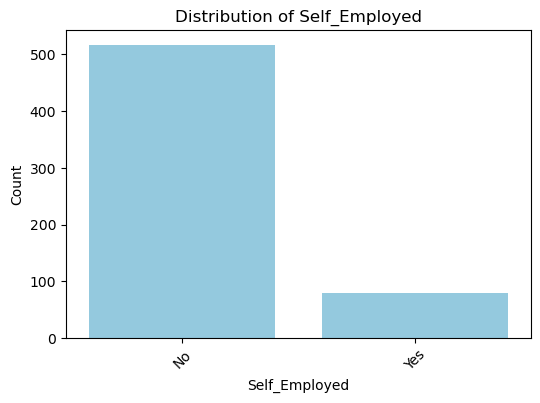

Value counts for Self_Employed:
Self_Employed
No     517
Yes     79
Name: count, dtype: int64



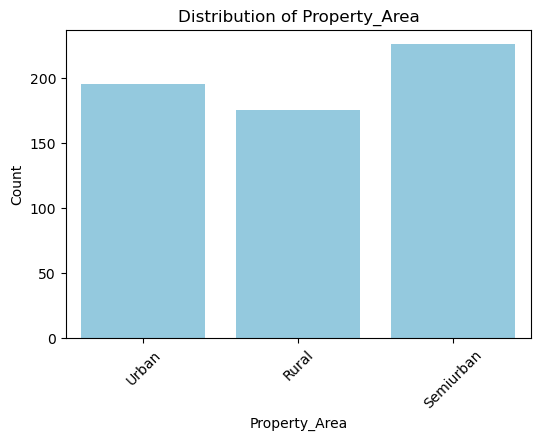

Value counts for Property_Area:
Property_Area
Semiurban    226
Urban        195
Rural        175
Name: count, dtype: int64



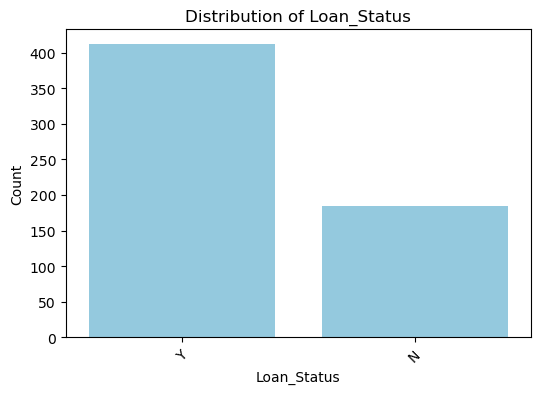

Value counts for Loan_Status:
Loan_Status
Y    412
N    184
Name: count, dtype: int64



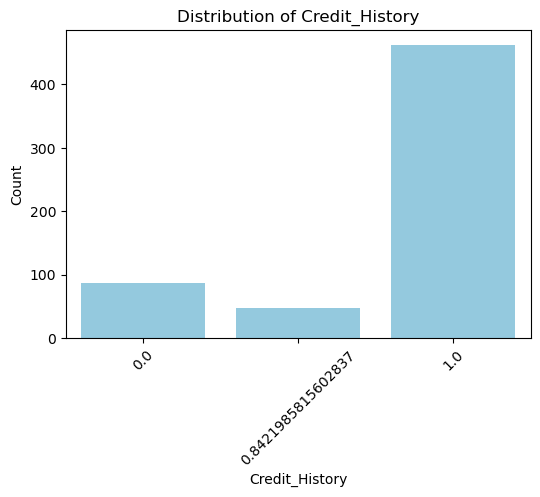

Value counts for Credit_History:
Credit_History
1.000000    463
0.000000     86
0.842199     47
Name: count, dtype: int64



In [136]:
# Check all column names in newdf2
print(newdf2.columns)

# Remove leading/trailing spaces from column names
newdf2.columns = newdf2.columns.str.strip()

# Now try plotting again
categorical_features = ['Gender', 'Married', 'Dependents', 'Education','Loan_Amount_Term', 
                        'Self_Employed', 'Property_Area', 'Loan_Status', 'Credit_History']

# Plot each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=newdf2, x=feature, hue=None, legend=False, color="skyblue") 
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

    # Print value counts
    print(f"Value counts for {feature}:\n{newdf2[feature].value_counts()}\n")


In [137]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64

## 1. Gender

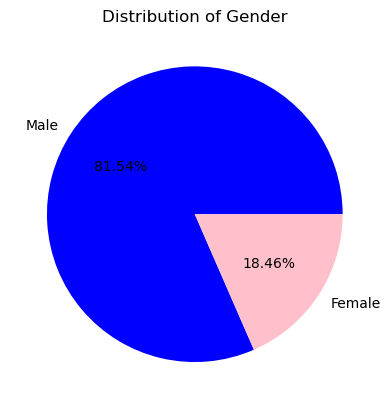

In [139]:
newdf2['Gender'].value_counts().plot(kind='pie', autopct='%.2f%%', colors=['blue', 'pink'], labels=['Male', 'Female'])
plt.title('Distribution of Gender')
plt.ylabel('') 
plt.show()

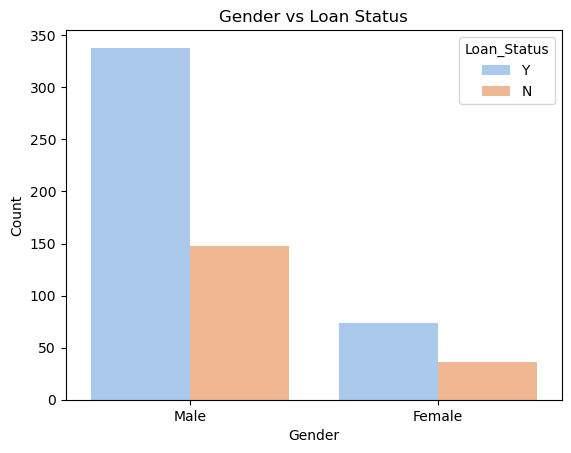

In [140]:


# Count plot for relationship between Gender and Loan_Status
sns.countplot(data=newdf2, x='Gender', hue='Loan_Status', palette='pastel')
plt.title("Gender vs Loan Status")
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()



##  Gender is also playing key role in loan approval 

# 2. Married

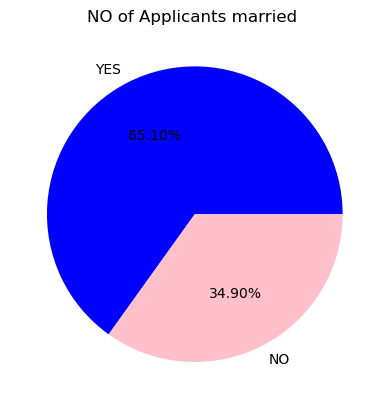

In [143]:
newdf2['Married'].value_counts().plot(kind='pie', autopct='%.2f%%', colors=['blue', 'pink'], labels=['YES', 'NO'])
plt.title('NO of Applicants married ')
plt.ylabel('') 
plt.show()

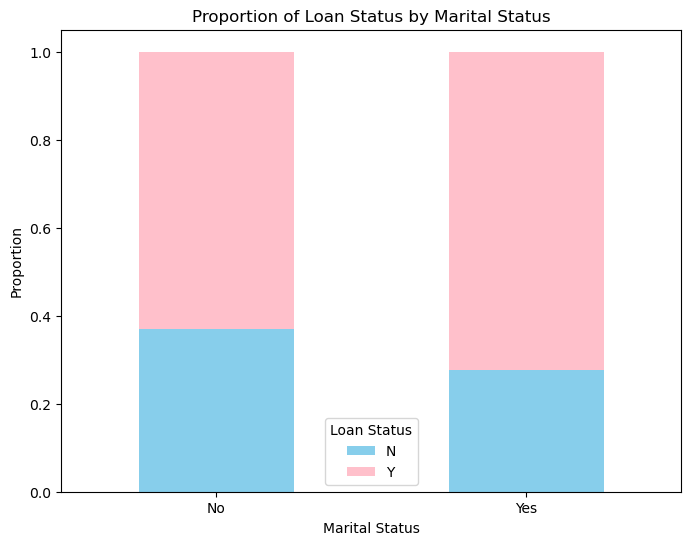

In [146]:
# Crosstab for Marrital Status  and loan status
Married_loan_crosstab = pd.crosstab(newdf2['Married'], newdf2['Loan_Status'], normalize='index')

# Plotting stacked bar chart
Married_loan_crosstab.plot(kind='bar', stacked=True, color=['skyblue', 'pink'], figsize=(8, 6))
plt.title("Proportion of Loan Status by Marital Status")
plt.xlabel('Marital Status')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Loan Status')
plt.show()



## MArital Status also has a significant impact in approval of loan as if you are married then you have high chances of loan approval

# 3. Dependents

In [148]:
newdf2['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

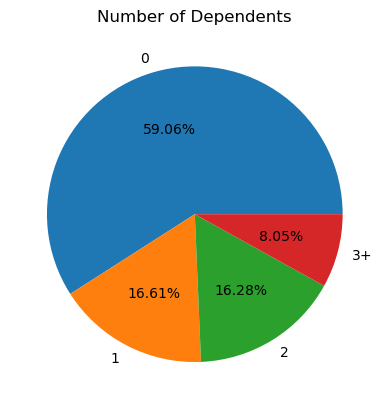

In [150]:
newdf2['Dependents'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.title('Number of Dependents')
plt.ylabel('') 
plt.show()

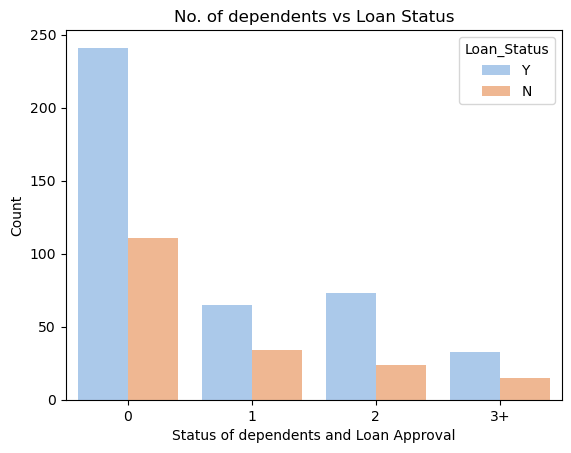

In [152]:


# Count plot for relationship between No of dependents and Loan_Status
sns.countplot(data=newdf2, x='Dependents', hue='Loan_Status', palette='pastel')
plt.title("No. of dependents vs Loan Status")
plt.xlabel('Status of dependents and Loan Approval')
plt.ylabel('Count')
plt.show()


## As it can be seen that people with no dependents have good chance of loan Approval also if you have a family of 3 (i.e 2 dependents and self) also have high chances

# 4. Education

In [154]:
newdf2['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

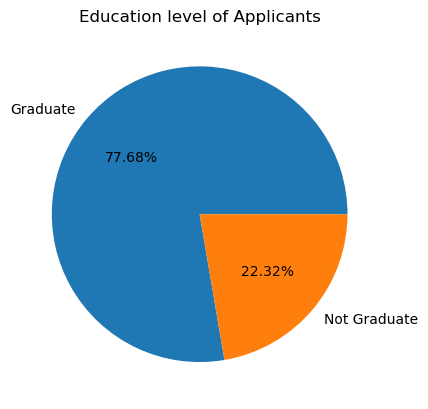

In [156]:
newdf2['Education'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.title('Education level of Applicants')
plt.ylabel('') 
plt.show()

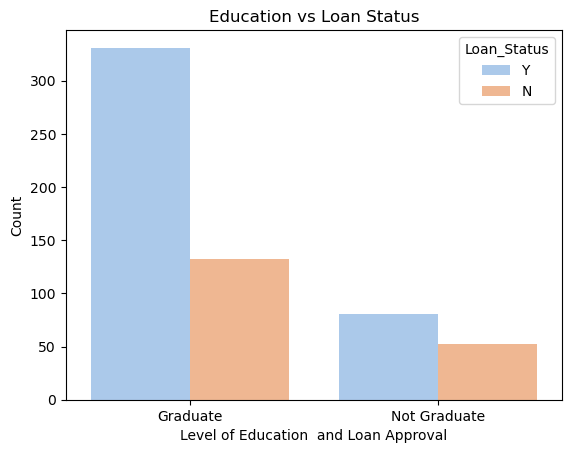

In [158]:


# Count plot for relationship between Education and Loan_Status
sns.countplot(data=newdf2, x='Education', hue='Loan_Status', palette='pastel')
plt.title("Education vs Loan Status")
plt.xlabel('Level of Education  and Loan Approval')
plt.ylabel('Count')
plt.show()

## As it can be seen that education level has an impact over loan approval 

## 4. Self Employed

In [160]:
newdf2['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

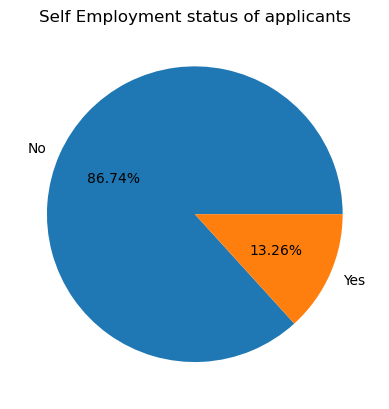

In [162]:
newdf2['Self_Employed'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.title('Self Employment status of applicants')
plt.ylabel('') 
plt.show()

## Large Chunck of people who are not self employed have applied for loans 

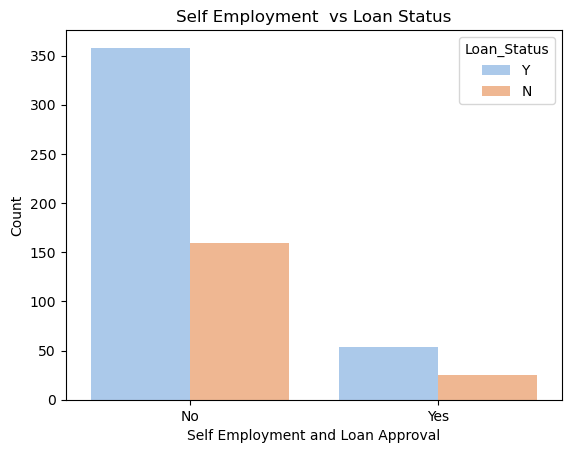

In [164]:


# Count plot for relationship between Self Employment and Loan_Status
sns.countplot(data=newdf2, x='Self_Employed', hue='Loan_Status', palette='pastel')
plt.title("Self Employment  vs Loan Status")
plt.xlabel('Self Employment and Loan Approval')
plt.ylabel('Count')
plt.show()

### A different pattern has been observed from the general perception that people who are not self employed have high chances of theior loan getting approved rather than who are self employed

# 5. Loan Amount Term 

In [167]:
newdf2['Loan_Amount_Term'].unique()

array([360., 120., 240., 342., 180.,  60., 300., 480.,  36.,  84.,  12.])

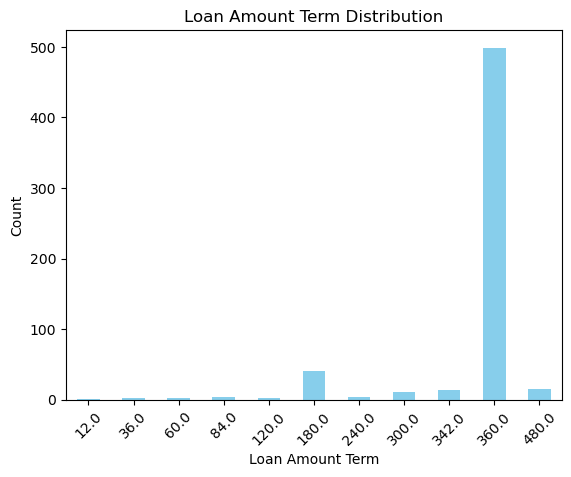

In [169]:
newdf2['Loan_Amount_Term'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Loan Amount Term Distribution')
plt.xlabel('Loan Amount Term')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### There is large chunck of people who takes loan for 360 months and also significant amount of people takes loan for 180 months

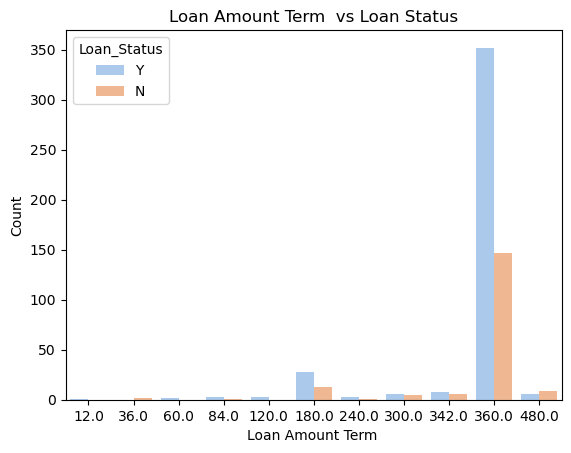

In [172]:

# Count plot for relationship between Loan Amount Term and Loan_Status
sns.countplot(data=newdf2, x='Loan_Amount_Term', hue='Loan_Status', palette='pastel')
plt.title("Loan Amount Term  vs Loan Status")
plt.xlabel('Loan Amount Term ')
plt.ylabel('Count')
plt.show()

## Hence people who take loan for 360 months will get their loans approved easily  as they have high chances of approval

# 6. Credit Hsitory

In [175]:
newdf2['Credit_History'].unique()

array([1.        , 0.        , 0.84219858])

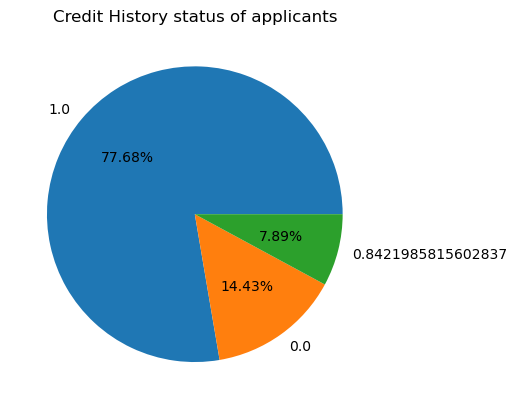

In [177]:
newdf2['Credit_History'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.title('Credit History status of applicants')
plt.ylabel('') 
plt.show()

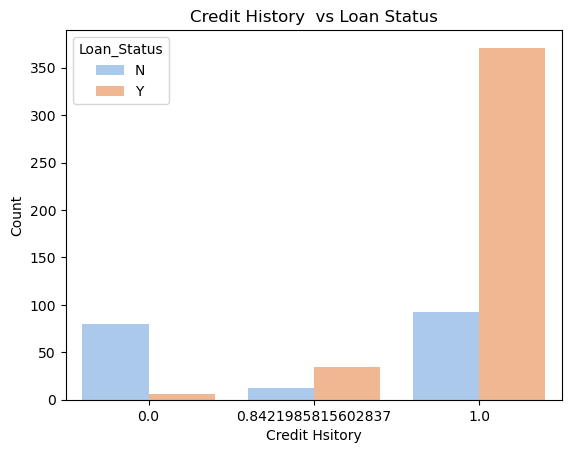

In [179]:

# Count plot for relationship between Credit History and Loan_Status
sns.countplot(data=newdf2, x='Credit_History', hue='Loan_Status', palette='pastel')
plt.title("Credit History  vs Loan Status")
plt.xlabel('Credit Hsitory')
plt.ylabel('Count')
plt.show()

## Largely people having credit score as 1 will have High loan approval Chances 

# 7. Property Area

In [181]:
newdf2['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

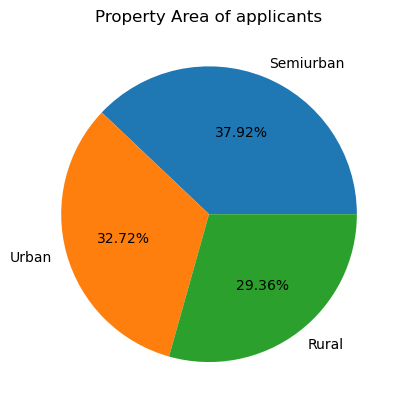

In [183]:
newdf2['Property_Area'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.title('Property Area of applicants')
plt.ylabel('') 
plt.show()

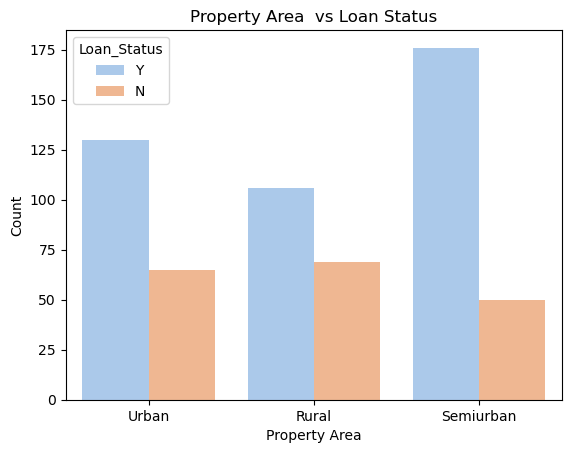

In [185]:

# Count plot for relationship between Property Area and Loan_Status
sns.countplot(data=newdf2, x='Property_Area', hue='Loan_Status', palette='pastel')
plt.title("Property Area  vs Loan Status")
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.show()

## Hence people living in Semi urban Areas have high changes of Loan Approval

## **OVERALL CONCLUSIONS**
Analysis over above dataset provide few aspects like:
 1. if you are male then you have good chances of loan approval
 2. if you are married then you have good chances
 3. if you have no dependents then you have high chances of loan approval  or just 2 dependents then you have significant chances of loan approval
 4. If you are graduate then you have high chances of Loan Approval
 5. But if you are Self Employed then you have less chances of approval
 6. if loan amount term is 360 months then loan will get approved
 7. if credit history is 1 then loan would get approved
 8. if you have property in Semi urban Area then it gets approved 

# 4. Feature Engineering


# Encoding Categorical Data 
1. we'll use label encoder for output data
2. we'll use one-hot encoding for input data

In [187]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode Loan_Status
newdf2['Loan_Status'] = label_encoder.fit_transform(newdf2['Loan_Status'])

In [189]:
# List of categorical input columns
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education','Loan_Amount_Term',
                       'Self_Employed', 'Property_Area', 'Credit_History']

# Apply One-Hot Encoding to categorical columns
newdf2= pd.get_dummies(newdf2, columns=categorical_columns, drop_first=True)

In [191]:
newdf2

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,...,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_342.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Credit_History_0.8421985815602837,Credit_History_1.0
0,LP001002,5849.0,0.0,146.412162,1,True,False,False,False,False,...,False,False,False,True,False,False,False,True,False,True
1,LP001003,4583.0,1508.0,128.000000,0,True,True,True,False,False,...,False,False,False,True,False,False,False,False,False,True
2,LP001005,3000.0,0.0,66.000000,1,True,True,False,False,False,...,False,False,False,True,False,True,False,True,False,True
3,LP001006,2583.0,2358.0,120.000000,1,True,True,False,False,False,...,False,False,False,True,False,False,False,True,False,True
4,LP001008,6000.0,0.0,141.000000,1,True,False,False,False,False,...,False,False,False,True,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,2900.0,0.0,71.000000,1,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
610,LP002979,4106.0,0.0,40.000000,1,True,True,False,False,True,...,False,False,False,False,False,False,False,False,False,True
611,LP002983,8072.0,240.0,250.000000,1,True,True,True,False,False,...,False,False,False,True,False,False,False,True,False,True
612,LP002984,7583.0,0.0,187.000000,1,True,True,False,True,False,...,False,False,False,True,False,False,False,True,False,True


In [193]:
print(newdf2.columns)

Index(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Status', 'Gender_Male', 'Married_Yes', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Not Graduate',
       'Loan_Amount_Term_36.0', 'Loan_Amount_Term_60.0',
       'Loan_Amount_Term_84.0', 'Loan_Amount_Term_120.0',
       'Loan_Amount_Term_180.0', 'Loan_Amount_Term_240.0',
       'Loan_Amount_Term_300.0', 'Loan_Amount_Term_342.0',
       'Loan_Amount_Term_360.0', 'Loan_Amount_Term_480.0', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban',
       'Credit_History_0.8421985815602837', 'Credit_History_1.0'],
      dtype='object')


## 5. Model Training and Building 

In [195]:
data = newdf2
data

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,...,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_342.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Credit_History_0.8421985815602837,Credit_History_1.0
0,LP001002,5849.0,0.0,146.412162,1,True,False,False,False,False,...,False,False,False,True,False,False,False,True,False,True
1,LP001003,4583.0,1508.0,128.000000,0,True,True,True,False,False,...,False,False,False,True,False,False,False,False,False,True
2,LP001005,3000.0,0.0,66.000000,1,True,True,False,False,False,...,False,False,False,True,False,True,False,True,False,True
3,LP001006,2583.0,2358.0,120.000000,1,True,True,False,False,False,...,False,False,False,True,False,False,False,True,False,True
4,LP001008,6000.0,0.0,141.000000,1,True,False,False,False,False,...,False,False,False,True,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,2900.0,0.0,71.000000,1,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
610,LP002979,4106.0,0.0,40.000000,1,True,True,False,False,True,...,False,False,False,False,False,False,False,False,False,True
611,LP002983,8072.0,240.0,250.000000,1,True,True,True,False,False,...,False,False,False,True,False,False,False,True,False,True
612,LP002984,7583.0,0.0,187.000000,1,True,True,False,True,False,...,False,False,False,True,False,False,False,True,False,True


In [199]:
# Check if 'Loan_ID' exists before attempting to drop it
if 'Loan_ID' in data.columns:
    data = data.drop('Loan_ID', axis=1)
else:
    print("Column 'Loan_ID' not found in the DataFrame.")


Column 'Loan_ID' not found in the DataFrame.


In [201]:
data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,...,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_342.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Credit_History_0.8421985815602837,Credit_History_1.0
0,5849.0,0.0,146.412162,1,True,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,True
1,4583.0,1508.0,128.000000,0,True,True,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,3000.0,0.0,66.000000,1,True,True,False,False,False,False,...,False,False,False,True,False,True,False,True,False,True
3,2583.0,2358.0,120.000000,1,True,True,False,False,False,True,...,False,False,False,True,False,False,False,True,False,True
4,6000.0,0.0,141.000000,1,True,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900.0,0.0,71.000000,1,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
610,4106.0,0.0,40.000000,1,True,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
611,8072.0,240.0,250.000000,1,True,True,True,False,False,False,...,False,False,False,True,False,False,False,True,False,True
612,7583.0,0.0,187.000000,1,True,True,False,True,False,False,...,False,False,False,True,False,False,False,True,False,True


In [212]:
# Train test split
X = data.iloc[:, :-1]  # Select all rows and all columns except the last one
y = data.iloc[:, -1]   # Select the last column as target

In [215]:
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,...,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_342.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Credit_History_0.8421985815602837
0,5849.0,0.0,146.412162,1,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,4583.0,1508.0,128.000000,0,True,True,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,3000.0,0.0,66.000000,1,True,True,False,False,False,False,...,False,False,False,False,True,False,True,False,True,False
3,2583.0,2358.0,120.000000,1,True,True,False,False,False,True,...,False,False,False,False,True,False,False,False,True,False
4,6000.0,0.0,141.000000,1,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900.0,0.0,71.000000,1,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
610,4106.0,0.0,40.000000,1,True,True,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
611,8072.0,240.0,250.000000,1,True,True,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
612,7583.0,0.0,187.000000,1,True,True,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False


In [207]:
y

0       True
1       True
2       True
3       True
4       True
       ...  
609     True
610     True
611     True
612     True
613    False
Name: Credit_History_1.0, Length: 596, dtype: bool

### Train test split

In [218]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Logistic Regression

In [220]:

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
# Scale the training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [222]:

# Train the model with scaled data
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model1.predict(X_test_scaled)


## Performance of model 1

In [224]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 78.33%
Confusion Matrix:
[[15 11]
 [15 79]]
Classification Report:
              precision    recall  f1-score   support

       False       0.50      0.58      0.54        26
        True       0.88      0.84      0.86        94

    accuracy                           0.78       120
   macro avg       0.69      0.71      0.70       120
weighted avg       0.80      0.78      0.79       120



# 2. SVM (Support Vector Machine)

In [244]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Fit the model to the training data
svm_model.fit(X_train, y_train)

# Predict on the test data
y_pred_svm = svm_model.predict(X_test)



# 2.1 Performance of model 2

In [245]:
# Evaluate the model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Model Accuracy: {svm_accuracy * 100:.2f}%")

# Confusion Matrix
print("Confusion Matrix of SVM:")
print(confusion_matrix(y_test, y_pred_svm))

# Classification Report
print("Classification Report of SVM:")
print(classification_report(y_test, y_pred_svm))

SVM Model Accuracy: 80.83%
Confusion Matrix of SVM:
[[10 16]
 [ 7 87]]
Classification Report of SVM:
              precision    recall  f1-score   support

       False       0.59      0.38      0.47        26
        True       0.84      0.93      0.88        94

    accuracy                           0.81       120
   macro avg       0.72      0.66      0.67       120
weighted avg       0.79      0.81      0.79       120



# 3. Decision Tree

In [253]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dt_model.fit(X_train, y_train)

# Predict on the test data
y_pred_dt = dt_model.predict(X_test)



# 3.1 Performance of model 3 

In [247]:
# Evaluate the model
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Model Accuracy: {dt_accuracy * 100:.2f}%")


Decision Tree Model Accuracy: 80.00%


## Hence By checking the accuracy of all the 3 models we get to know that our model 2 i.e. SVM model works perfect by giving 81% accuracy approx and in case of decision tree it gives 80% and in case of logistic regression it was about 78%

# Deployment 

In [270]:
from sklearn.svm import SVC
import pickle
# Initialize SVM model
Classifier = SVC(kernel='linear', C=1.0)  # You can adjust parameters as needed

# Train the model
Classifier.fit(X_train, y_train)



SVC(kernel='linear')

In [309]:
import pickle

# Save the trained model as a .pkl file
with open('LoanClassifier.pkl', 'wb') as file:
    pickle.dump(Classifier, file)


In [299]:
import os
print(os.listdir())


['.ipynb_checkpoints', 'Classifier.pkl', 'Loan.ipynb', 'LoanClassifier.pkl', 'LoanDataset.csv']
